# Demo 4: FEDS Archived V.S. CAL FIRE California Perimeter All Collection for 2020 August Complex

### Summary

This notebook demonstrates the capabilities of the FEDS-PEC module to compare a local CAL FIRE periemter to a local FEDS perimeter

Sources for demonstration:
- FEDS archived perimeters, labeled as `"public.eis_fire_lf_perimeter_archive"`
- CAL FIRE all california perimeters, treated as historic, labeled as `"california_fire_perimeters_all"`


The FEDS input and reference input can use either a pre-defined setting or can accept (valid) user-written paths to shape files. 
- For Input all settings, please see **section INPUT SETTINGS of README.md**  
- Output settings can also be modified to control if calculations are printed, plotted, and/or stored into a file (with location and file type of choice); for more detail on outputs please see **section OUTPUT SETTINGS of README.md**


In [1]:
import sys
sys.path.append('../') # local path append

import Utilities
import Input_FEDS
import Input_Reference
import Output_Calculation

from Input_FEDS import InputFEDS
from Input_Reference import InputReference
from Output_Calculation import OutputCalculation
from Utilities import *

In [ ]:
# this is the ONLY thing users are intended to modify!
# inputs for searching FEDS and nifc sets

# START TIME
year_start = 2020
month_start = 8
day_start = 15
hour_start = 0
minute_start = 0
second_start = 0
tz_offset_hours_start = 0
tz_offset_minutes_start = 0
utc_offset_start = '00:00'

# END TIME
year_stop = 2020
month_stop = 9
day_stop = 20
hour_stop = 0
minute_stop = 0
second_stop = 0
tz_offset_hours_stop = 0
tz_offset_minutes_stop = 0
utc_offset_stop = '00:00'

# CRS - 4326 RECOMMENDED FEDS FIRE PERIM DEFAULT
crs = 3857 # 4326

# BBOX FOR SEARCH - [lon, lat, lon, lat]
# 40.634026, -123.894958
# 39.529218, -122.290878
search_bbox = ["-123.894958","40.634026","-122.290878","39.529218"]


day_search_range = 7 # acceptable distance to search from feds -> reference (e.g. if refernce polygon is 8 days away, it is not included in calculations)

# FEDS INPUT SETTINGS  # [Change to FEDS Input settings]
feds_title = "firenrt"
feds_collection =  "public.eis_fire_lf_perimeter_archive"
feds_access_type = "api" # or "local
feds_limit = 1000 # amount of features to consider for FEDS API access; warning appears if it misses any entries
feds_filter = False # False or a valid query: e.g. "farea>5 AND duration>2"
feds_apply_finalfire = True # set this to true if you want the only the latest fireID to be taken per unique FireID

# REFERENCE INPUT SETTINGS 
ref_title = "california_fire_perimeters_all" # this is a predefined set example
ref_control_type = "defined" # or "custom"
ref_custom_url = "none" # not custom for demo
ref_custom_read_type = "none"  # not custom for demo
ref_custom_col_assign = {"time": "DATE_CUR", 
                         "time_format": "%Y%m%d", 
                         "incident_name": "INCIDENT"
                        } # if using a custom dataset, need to map cols 
ref_filter = False # False or a valid query

# OUTPUT SETTINGS - User discretion advised for path functionality
print_on = True
plot_on = True
name_for_output_file = "cal_fire_feds_august_analysis"
output_format = "csv"
user_path = "/projects/my-public-bucket/VEDA-PEC/results"
output_maap_url = f"{user_path}/{name_for_output_file}.{output_format}"

### Argument Processing: format and check to report any issues
- Note: upon instance instantiation we can also get reports back of invalidity -> any warnings/errors should be addressed

In [3]:

# start date formatting
search_start = Utilities.format_datetime(year_start, 
                                         month_start, 
                                         day_start, 
                                         hour_start, 
                                         minute_start, 
                                         second_start, 
                                         tz_offset_hours_start, 
                                         tz_offset_minutes_start,
                                         utc_offset_start)
# stop date formatting
search_stop = Utilities.format_datetime(year_stop, 
                                        month_stop, 
                                        day_stop, 
                                        hour_stop, 
                                        minute_stop, 
                                        second_stop, 
                                        tz_offset_hours_stop, 
                                        tz_offset_minutes_stop,
                                        utc_offset_stop)

# bound check the bbox
assert Utilities.check_bbox(search_bbox), f"ERR: passed bbox {search_bbox} is not valid; check bounds"
assert  Utilities.check_crs(crs), f"ERR: invalid crs provided {crs}; please enter valid ESPG CRS number"

### Using Inputs: Instantiate Inputs + Calculation Output

With our inputs, we are ready to start; run this to get the program to fetch the FEDS candidates in the provided time/location window, along with an intersecting NIFC in the specific day range

You may see an ERROR 1 occur; ignore this unless block throws actual exception...
You may see WARNING:fiona.ogrext:Expecting property name enclosed in double quotes: line 1 column 2 (char 1); you can ignore this error safely


ERROR 1: PROJ: proj_create_from_database: Open of /projects/env-feds/share/proj failed
Running FEDS-Reference Match Algorithm:  38%|███▊      | 3/8 [00:37<01:02, 12.46s/polygon]

FAILED TIME WINDOW: No matching dates found even with provided day search range window: 7, critical benchmarking failure. 
Due to failing window, use first intersection as value 


Running FEDS-Reference Match Algorithm:  50%|█████     | 4/8 [00:49<00:49, 12.42s/polygon]

FAILED TIME WINDOW: No matching dates found even with provided day search range window: 7, critical benchmarking failure. 
Due to failing window, use first intersection as value 


Running FEDS-Reference Match Algorithm: 100%|██████████| 8/8 [01:39<00:00, 12.45s/polygon]


DATE MATCHING COMPLETE
NO CALCULATION RESULTS, SKIP FEDS INDEX 169 & REFERENCE INDEX 169
NO CALCULATION RESULTS, SKIP FEDS INDEX 82 & REFERENCE INDEX 82
NO CALCULATION RESULTS, SKIP FEDS INDEX 78 & REFERENCE INDEX 78
CALCULATED A RESULT: POLYGON FEDS AT INDEX 37 AGAINST REFERENCE POLYGON AT INDEX 1349:
Ratio: 64.50006149222688, Accuracy: 0.55832432550387, Precision: 0.0008982986587313467, Recall: 0.05794031872655678, IOU: 0.0008722030039610364, F1 0.0017691683765345095, Symmetric Ratio: 65.38418085477379
All measurements in units metre
CALCULATED A RESULT: POLYGON FEDS AT INDEX 214 AGAINST REFERENCE POLYGON AT INDEX 23:
Ratio: 1.219209022973419, Accuracy: 0.8248219586114555, Precision: 0.745905415530306, Recall: 0.9094146128992864, IOU: 0.5035198432244007, F1 0.8195844586832136, Symmetric Ratio: 0.40037979717484207
All measurements in units metre
NO CALCULATION RESULTS, SKIP FEDS INDEX 171 & REFERENCE INDEX 171
NO CALCULATION RESULTS, SKIP FEDS INDEX 157 & REFERENCE INDEX 157
NO CALCUL

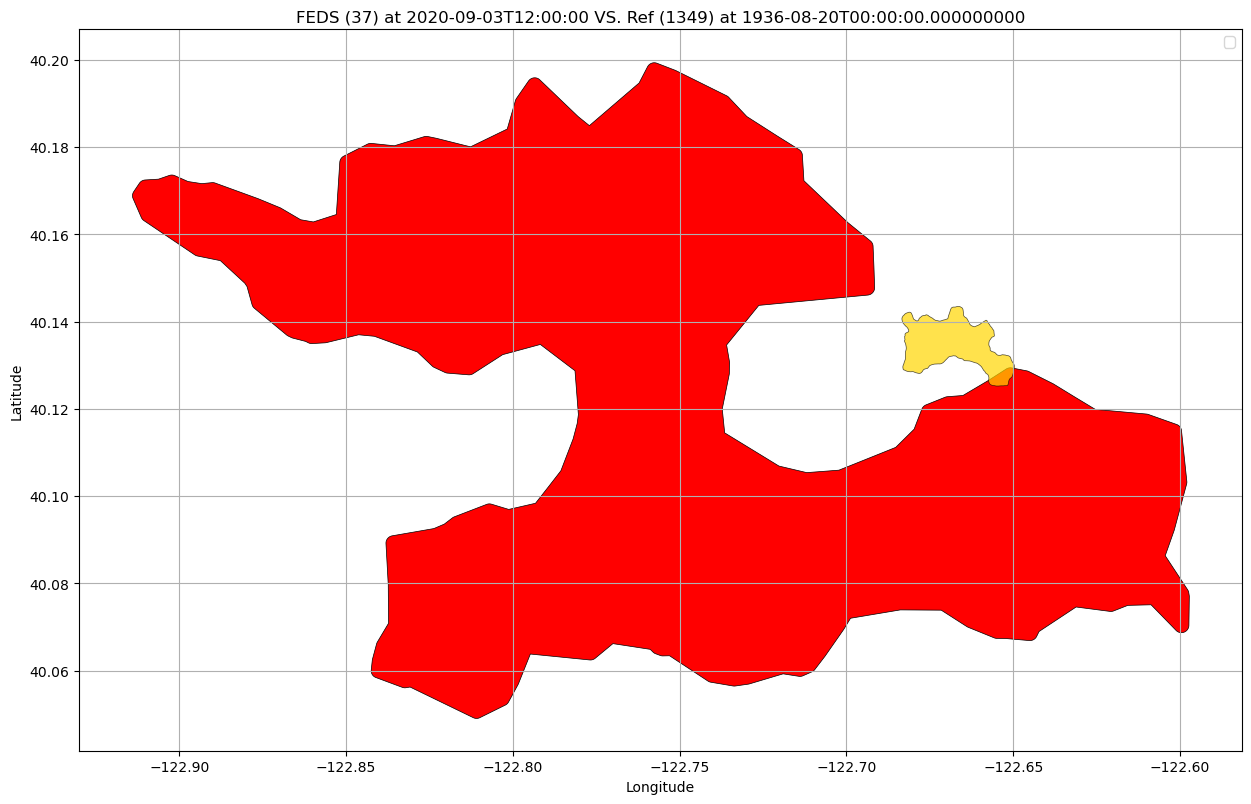

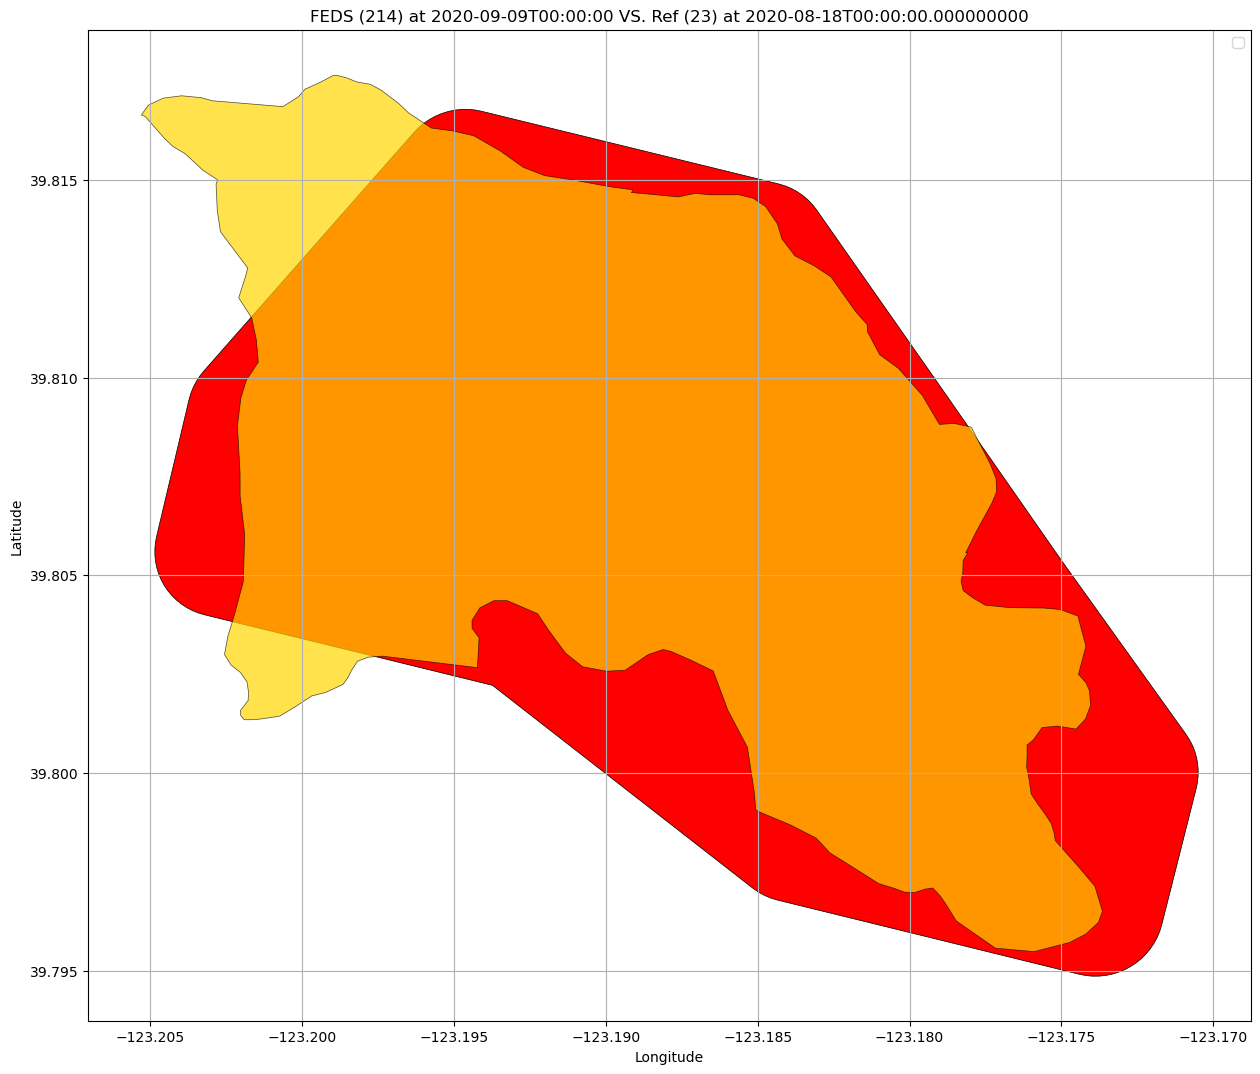

PLOTTING COMPLETE


CSV output complete! Check file /projects/my-public-bucket/VEDA-PEC/results/cal_fire_feds_august_analysis.csv for results. NOTE: None result rows were excluded.


In [4]:
# create instances to track properties
print('You may see an ERROR 1 occur; ignore this unless block throws actual exception...')
print('You may see WARNING:fiona.ogrext:Expecting property name enclosed in double quotes: line 1 column 2 (char 1); you can ignore this error safely')

import warnings
warnings.filterwarnings('ignore')
    
feds_firenrt = InputFEDS(
                 feds_title, 
                 feds_collection, 
                 search_start,
                 search_stop,
                 search_bbox,
                 crs,
                 feds_access_type,
                 feds_limit,
                 feds_filter,
                 feds_apply_finalfire
                )

nifc_search = InputReference( 
                 search_start,
                 search_stop,
                 search_bbox,
                 crs,
                 ref_title,
                 ref_control_type,
                 ref_custom_url,
                 ref_custom_read_type,
                 ref_custom_col_assign,
                 ref_filter,
                )

my_output = OutputCalculation(
                feds_firenrt,
                nifc_search,
                output_format, 
                output_maap_url,
                day_search_range,
                print_on,
                plot_on
                )

### Export Polygons

Provide a path along with polygons, and then call on the `export_polygons` method for your OutputCalculation object

In [5]:
# name your file
shp_file_name = "feds_used"
# resuses the same dir as the csv export 
output_shp_path = f"{user_path}/{shp_file_name}.shp"

my_output.export_polygons(feds_firenrt.polygons, output_shp_path)

Export complete to path: /projects/my-public-bucket/VEDA-PEC/results/feds_used.shp
